In [1]:
%matplotlib inline

# Part 1

## Exercise 1

Recall that n!
is read as “n factorial” and defined as n!=n×(n−1)×⋯×2×1

There are functions to compute this in various modules, but let’s write our own version as an exercise

In particular, write a function factorial such that factorial(n) returns n!
for any positive integer n.

In [36]:
def genfactorial(n:int)->int:
    if n==1 or n==0:
        return 1
    else:
        return n*genfactorial(n-1)
    
genfactorial(2), genfactorial(3), genfactorial(5)

(2, 6, 120)

## Exercise 2

The binomial random variable Y∼Bin(n,p)
represents the number of successes in n binary trials, where each trial succeeds with probability p

Without any import besides from numpy.random import uniform, write a function binomial_rv such that binomial_rv(n, p) generates one draw of Y

Hint: If U
is uniform on (0,1) and p∈(0,1), then the expression U < p evaluates to True with probability p

In [3]:
from numpy.random import uniform as uniformRandom
def genBinomialProbs(n:int, p:float)->float:
    
    draws = [1 for x in range(0,n) if uniformRandom() < p]
    return sum(draws)

genBinomialProbs(10,0.5)
    

5

## Exercise 3
Compute an approximation to π

using Monte Carlo. Use no imports besides

`import numpy as np`

Your hints are as follows:

   * If U is a bivariate uniform random variable on the unit square (0,1)^2, then the probability that U lies in a subset B of (0,1)^2 is equal to the area of B.

   * If U1,…,Un are iid copies of U, then, as n gets large, the fraction that fall in B converges to the probability of landing in B

   * For a circle, area = pi * radius^2



In [4]:
import numpy as np

def MCgenPI(n:int)->float:
    
    allpts = [(np.random.uniform(),np.random.uniform()) for x in range(0,n)]
    circpts = [(x,y) for (x,y) in allpts if x*x+y*y<=1]
    
    return 4*len(circpts)/len(allpts)

MCgenPI(10),MCgenPI(100),MCgenPI(1000),MCgenPI(10000),MCgenPI(100000),MCgenPI(1000000)

(3.6, 3.16, 3.148, 3.1688, 3.137, 3.14124)

## Exercise 4

Write a program that prints one realization of the following random device:

    Flip an unbiased coin 10 times
    If 3 consecutive heads occur one or more times within this sequence, pay one dollar
    If not, pay nothing

Use no import besides from numpy.random import uniform

In [5]:
def flipnpay(n:int)->int:
    
    draws = [1 if np.random.uniform()>0.5 else 0 for x in range(n)]
    payout = [1 if (draws[i],draws[i-1],draws[i-2])==(1,1,1) else 0 for i in range(2,len(draws))]
    
    return sum(payout)
    
flipnpay(10),flipnpay(100),flipnpay(1000)

(1, 8, 113)

## Exercise 5

Your next task is to simulate and plot the correlated time series
xt+1=αxt+εt+1wherex0=0andt=0,…,T

The sequence of shocks {εt} is assumed to be iid and standard normal

In your solution, restrict your import statements to

```
import numpy as np
import matplotlib.pyplot as plt
```

Set T=200
and α=0.9

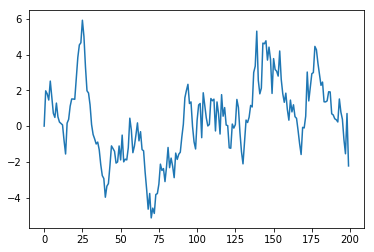

In [6]:
import matplotlib.pyplot as plt

def genshockplts(N:int,alpha:float)->None:
    
    timeseries = [0]*N
    shocks = np.random.randn(N)
    for i in range(1,len(timeseries)):
        timeseries[i] = alpha*timeseries[i-1] + shocks[i]
    plt.plot(timeseries)
    
genshockplts(200, 0.9)    

## Exercise 6

To do the next exercise, you will need to know how to produce a plot legend

The following example should be sufficient to convey the idea

```
import numpy as np
import matplotlib.pyplot as plt

x = [np.random.randn() for i in range(100)]
plt.plot(x, label="white noise")
plt.legend()
plt.show()
```

* Running it produces a figure like so
    `*../_images/pbe_white_noise_plot.png*`

* Now, starting with your solution to exercise 5, plot three simulated time series, one for each of the cases α=0, α=0.8 and α=0.98

    ** In particular, you should produce (modulo randomness) a figure that looks as follows
    `*../_images/pbe_ex2_fig.png*`

    (The figure nicely illustrates how time series with the same one-step-ahead conditional volatilities, as these three processes have, can have very different unconditional volatilities.)

* Use a for loop to step through the α values

* Important hints:

    * If you call the plot() function multiple times before calling show(), all of the lines you produce will end up on the same figure

            And if you omit the argument 'b-' to the plot function, Matplotlib will automatically select different colors for each line

* The expression `'foo' + str(42)` evaluates to `'foo42'`


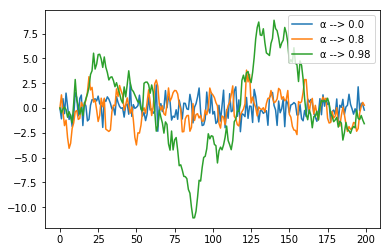

In [34]:
def genshocks(N:int,alpha:float)->np.ndarray:
    timeseries = np.zeros((N))
    shocks = np.random.randn(N)
    for i in range(1,len(timeseries)):
        timeseries[i] = alpha*timeseries[i-1] + shocks[i]
    return timeseries

αlphas = [0.0,0.8,0.98]

labelgen = lambda x:f'α --> {x}'

for α in αlphas:
    plt.plot(genshocks(200,α),label=labelgen(α))
plt.legend(loc='upper right')
plt.show()